In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Чтение данных

In [4]:
poll_data = pd.read_csv('../../data/mlcourse_open_first_survey_parsed.csv', index_col='id')

In [8]:
poll_data.head(3)

,Timestamp,Представьтесь в 2-3 фразах,Работали ли Вы с Jupyter notebooks?,Что Вы ждете от курса?,Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?,"Ладно, посерьезней: согласны ли Вы на обработку персональных данных?","Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)","Чему равна дисперсия равномерного на [0,6] распределения?","Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]",Сколько параметров у нормального распределения?,Сможете написать на Python генератор чисел Фибоначчи?,"Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro",Оцените свой уровень владения GitHub,"Посоветуйте хороший фильм в стиле ""Игра в имитацию"" :)"
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN
2,2016/12/05 10:47:07 am GMT+3,"Я Software Engeneer разработчик, активно интер...",Да,Побольше практики на реальных данных (задачах).,basketball,Да,3,3,NaN,2.0,Да,Да,Проф,NaN


In [6]:
poll_data.columns

Index(['Timestamp', 'Представьтесь в 2-3 фразах',
       'Работали ли Вы с Jupyter notebooks?', 'Что Вы ждете от курса?',
       'Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?',
       'Ладно, посерьезней: согласны ли Вы на обработку персональных данных?',
       'Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)',
       'Чему равна дисперсия равномерного на [0,6] распределения?',
       'Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]',
       'Сколько параметров у нормального распределения?',
       'Сможете написать на Python генератор чисел Фибоначчи?',
       'Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro',
       'Оцените свой уровень владения GitHub',
       'Посоветуйте хороший фильм в стиле "Игра в имитацию" :)'],
      dtype='object')

In [9]:
poll_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 0 to 3215
Data columns (total 14 columns):
Timestamp                                                                                                                                   2944 non-null object
Представьтесь в 2-3 фразах                                                                                                                  2944 non-null object
Работали ли Вы с Jupyter notebooks?                                                                                                         2931 non-null object
Что Вы ждете от курса?                                                                                                                      2944 non-null object
Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?                                           2638 non-null object
Ладно, посерьезней: согласны ли Вы на обработку персональных данных?                    

In [10]:
poll_data.shape

(2944, 14)

## Переименование признаков

In [11]:
new_columns = ['time', 'intro', 'jupyter', 'expect', 'sport', 'personal', 'math_level', 'quest1', 'quest2', 'quest3', 'fib_gen',
               'python', 'github', 'movie']

In [14]:
dict(zip(poll_data.columns, new_columns))

{'Timestamp': 'time',
 'Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)': 'math_level',
 'Ладно, посерьезней: согласны ли Вы на обработку персональных данных?': 'personal',
 'Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]': 'quest2',
 'Оцените свой уровень владения GitHub': 'github',
 'Посоветуйте хороший фильм в стиле "Игра в имитацию" :)': 'movie',
 'Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?': 'sport',
 'Представьтесь в 2-3 фразах': 'intro',
 'Работали ли Вы с Jupyter notebooks?': 'jupyter',
 'Сколько параметров у нормального распределения?': 'quest3',
 'Сможете написать на Python генератор чисел Фибоначчи?': 'fib_gen',
 'Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro': 'python',
 'Чему равна дисперсия равномерного на [0,6] распределения?': 'quest1',
 'Что Вы ждете от курса?': 'expect'}

In [15]:
rename_dic = dict(zip(poll_data.columns, new_columns))

In [17]:
poll_data.rename(columns=rename_dic, inplace=True)

In [18]:
poll_data.head(3)

,time,intro,jupyter,expect,sport,personal,math_level,quest1,quest2,quest3,fib_gen,python,github,movie
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN
2,2016/12/05 10:47:07 am GMT+3,"Я Software Engeneer разработчик, активно интер...",Да,Побольше практики на реальных данных (задачах).,basketball,Да,3,3,NaN,2.0,Да,Да,Проф,NaN


In [19]:
poll_data.columns

Index(['time', 'intro', 'jupyter', 'expect', 'sport', 'personal', 'math_level',
       'quest1', 'quest2', 'quest3', 'fib_gen', 'python', 'github', 'movie'],
      dtype='object')

In [24]:
poll_data['jupyter'].value_counts().head()

Да            2071
Нет            766
немного          7
Немного          3
Spyder IDE       2
Name: jupyter, dtype: int64

In [25]:
jupyer_levels = poll_data['jupyter'].map({'Да': 1, 'Нет': 0}).fillna(2)

In [26]:
jupyer_levels.value_counts()

1.0    2071
0.0     766
2.0     107
Name: jupyter, dtype: int64

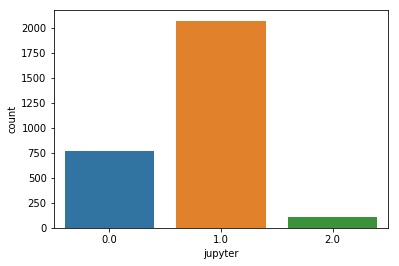

In [28]:
sns.countplot(jupyer_levels);

In [30]:
poll_data['sport'].value_counts().head()

Футбол       197
футбол       113
Баскетбол    113
Плавание      94
Хоккей        66
Name: sport, dtype: int64

**Процент ответивших на 3 вопрос**

In [35]:
poll_data['quest3'][~poll_data['quest3'].isnull()].shape[0]

2725

In [36]:
(poll_data['quest3'] == 2).dropna().sum() / poll_data['quest3'][~poll_data['quest3'].isnull()].shape[0]

0.9244036697247706

**Ищем топ-10 слов в представлении себя. При этом уберем стоп-слова**

In [44]:
arr = np.array([
    [1, 2],
    [3, 4]
])
arr

array([[1, 2],
       [3, 4]])

In [45]:
np.concatenate(arr)

array([1, 2, 3, 4])

In [46]:
all_words = np.concatenate(poll_data['intro'].apply(lambda s:
                                                    s.strip().split()).values)

In [47]:
len(all_words)

26533

In [49]:
import nltk

In [50]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ivanmagda/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [51]:
nltk.corpus.stopwords.words('russian')[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [56]:
words_series = pd.Series(list(all_words))
words_series.head()

0         крутой
1      Developer
2    Разработчик
3      Navision.
4         Изучаю
dtype: object

In [57]:
words_series[~words_series.isin(nltk.corpus.stopwords.words('russian'))].value_counts().head(10)

Студент     279
Работаю     201
курса       187
данных      178
Data        173
Я           166
работаю     157
data        130
машинным    123
ML          122
dtype: int64